CLAHE (Contrast Limited Adaptive Histogram Equalization) for improving contrast.CLAHE function is designed for the Grayscale ,But we can seperate eacch channel to LAB and apply for RGB aswell.

In [2]:
import cv2
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Image CLAHE')

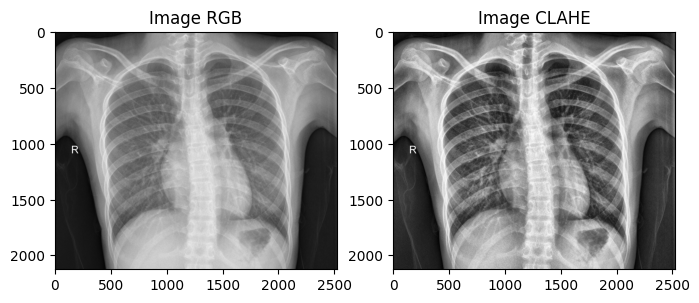

In [3]:
image = cv2.imread("./data/IM-0028-0001.jpeg")
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
CLAHE = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
grey = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
ch1 = CLAHE.apply(grey)

cv2.imwrite("./data/IM-0028-0001_clahe.jpeg", ch1)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.title("Image RGB")

plt.subplot(1,2,2)
plt.imshow(ch1, cmap="gray")
plt.title("Image CLAHE")

To Apply CLAHE on RGB images we will use LAB Colour space.LAB Color space is a color model designed to approx often used for image processing tasks like color correction and contrast adjustment.
L Channel : Lightness,
A Channel : Green - Red,
B Channel : Blue - Yellow

Text(0.5, 1.0, 'CLAHE Applied to RGB Image')

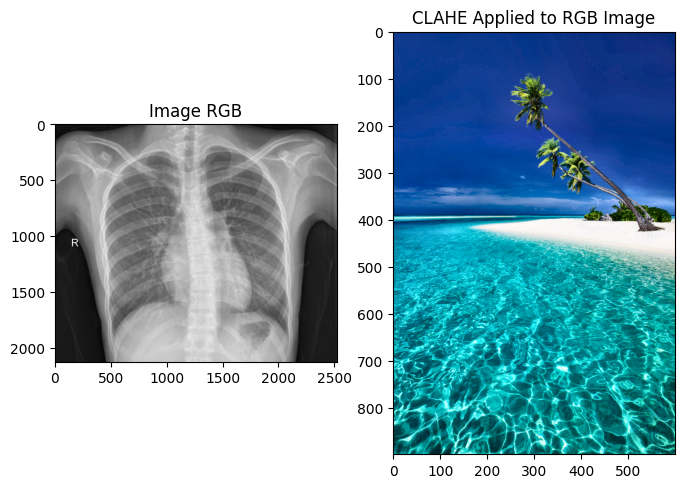

In [6]:
image = cv2.imread("./data/beach-blue.jpg")
# Convert to LAB color space
lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

# Split the LAB image into its channels
l_channel, a_channel, b_channel = cv2.split(lab)

# Apply CLAHE to the L (lightness) channel
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
cl1 = clahe.apply(l_channel)

# Merge the CLAHE enhanced L-channel with the original a and b channels
lab_clahe = cv2.merge((cl1, a_channel, b_channel))

# Convert LAB back to RGB for display
image_clahe = cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2RGB)

# Display the result
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title('Image RGB')

plt.subplot(1, 2, 2)
plt.imshow(image_clahe)
plt.title("CLAHE Applied to RGB Image")